In [1]:
from gym.wrappers import TimeLimit, FlattenObservation

from environments.simulation import ARESEAJOSS

initializing ocelot...


In [2]:
env = ARESEAJOSS()
env = TimeLimit(env, max_episode_steps=50)
print("")
print({k: v.low for k, v in env.observation_space.spaces.items()})
print({k: v.high for k, v in env.observation_space.spaces.items()})
env = FlattenObservation(env)
print("")
print(env.observation_space.low)
print(env.observation_space.high)
env


{'achieved_goal': array([-1., -1.,  0.,  0.], dtype=float32), 'desired_goal': array([-1., -1.,  0.,  0.], dtype=float32), 'observation': array([ 0., -1., -1., -1., -1., -1.], dtype=float32)}
{'achieved_goal': array([1., 1., 1., 1.], dtype=float32), 'desired_goal': array([1., 1., 1., 1.], dtype=float32), 'observation': array([1., 1., 1., 1., 1., 1.], dtype=float32)}

[-1. -1.  0.  0. -1. -1.  0.  0.  0. -1. -1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<FlattenObservation<TimeLimit<ARESEAJOSS instance>>>

In [3]:
env.observation_space

Box(-1.0, 1.0, (14,), float32)

In [4]:
env.reset()

array([ 0.37336606, -0.274717  ,  0.75975156,  1.1730016 , -0.313361  ,
        0.13803099,  0.4142942 ,  0.53925025,  0.99857   ,  0.38912126,
       -0.36857215, -0.90959954,  0.03203921,  0.59485257], dtype=float32)

In [5]:
env.goal

array([-0.00094008,  0.00020705,  0.00041429,  0.00053925], dtype=float32)

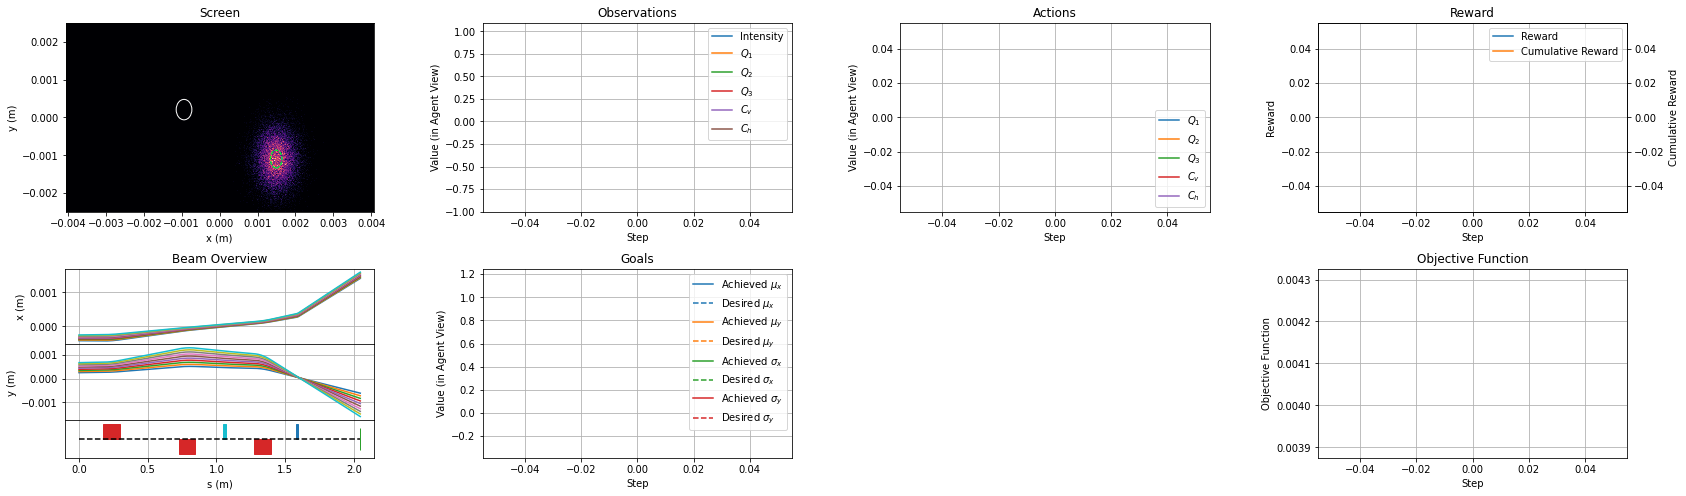

In [6]:
env.render()

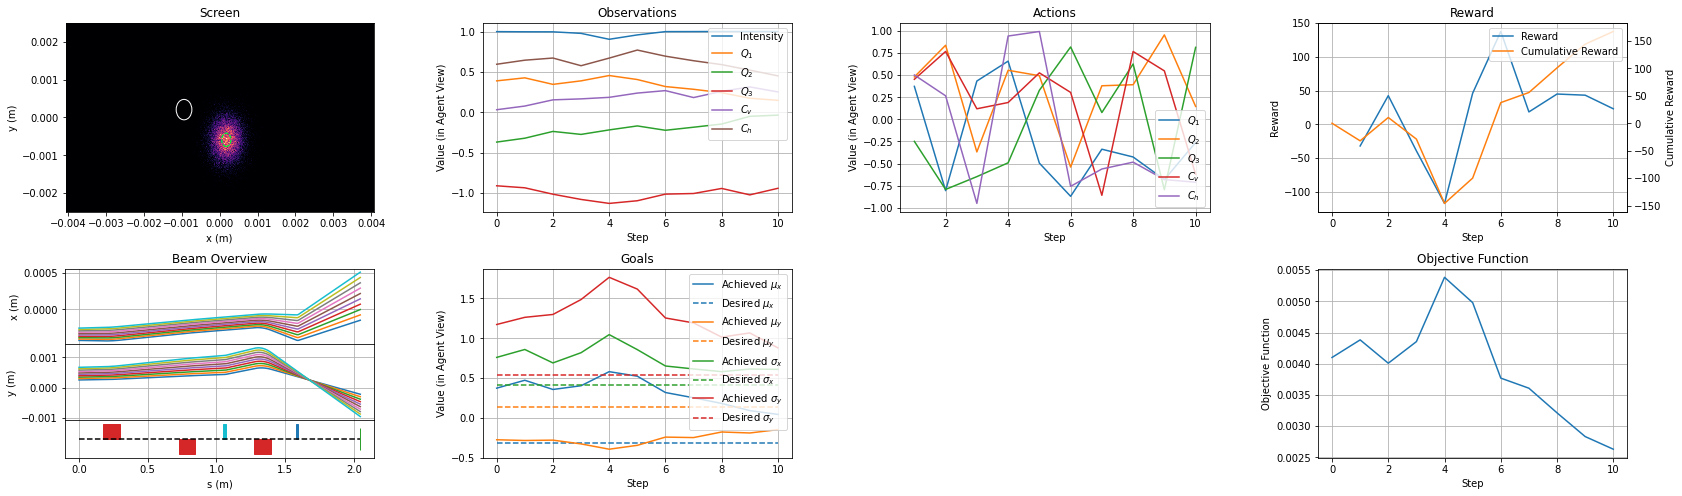

In [7]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [8]:
env.reset()
env.beam_parameters

array([-9.04947545e-04,  8.44243179e-04,  1.14647287e-04,  3.72921288e-05])

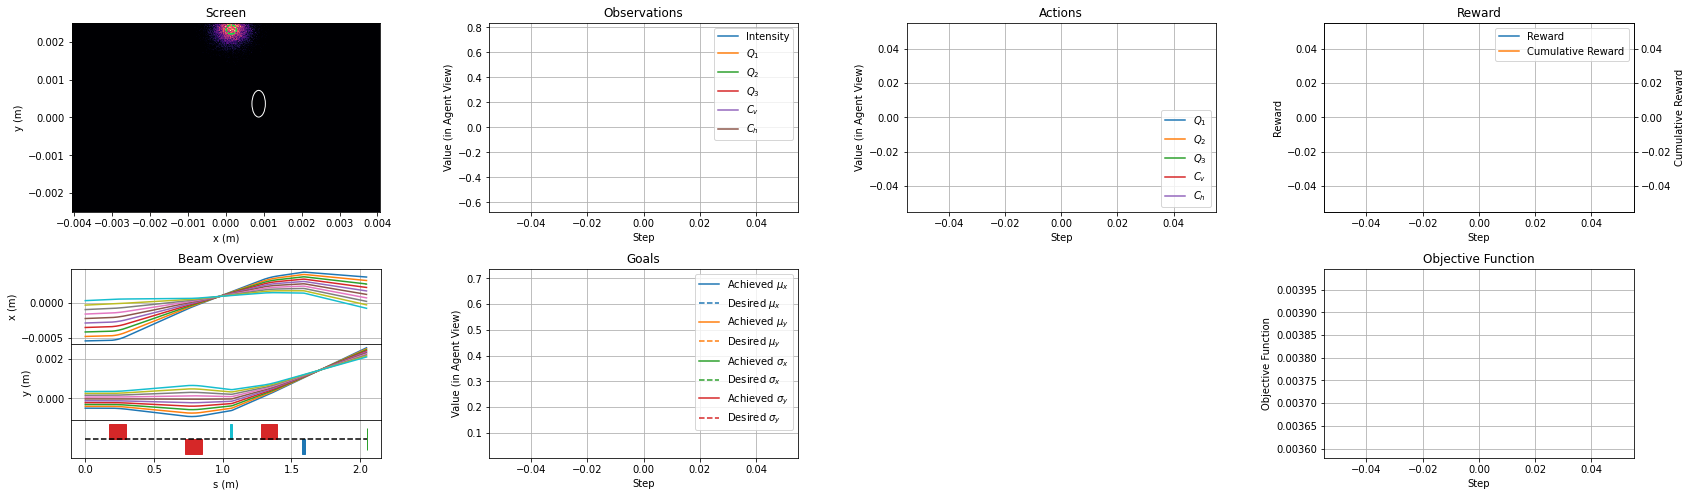

AttributeError: 'ARESEAJOSS' object has no attribute 'objective'

In [11]:
from scipy import optimize

env = ARESEAJOSS()
# env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(
    env.accelerator_optimization_space.low,
    env.accelerator_optimization_space.high
)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)